<a href="https://colab.research.google.com/github/harsrai1/pneumonia-patients/blob/main/pneumonia_patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np

In [ ]:
 import os
 os.environ['KAGGLE_CONFIG_DIR']= '/content'

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:36<00:00, 145MB/s]
100% 2.29G/2.29G [00:37<00:00, 66.5MB/s]


In [ ]:
 !unzip /content/chest-xray-pneumonia.zip -d /content/chest-xray-pneumonia


Streaming output truncated to the last 5000 lines.
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/chest-xray-pneumonia/chest_xray/

In [ ]:
path = '/content/chest-xray-pneumonia/chest_xray'

In [ ]:
data = ImageDataLoaders.from_folder(
    path=path,
    train='.',
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224)
)

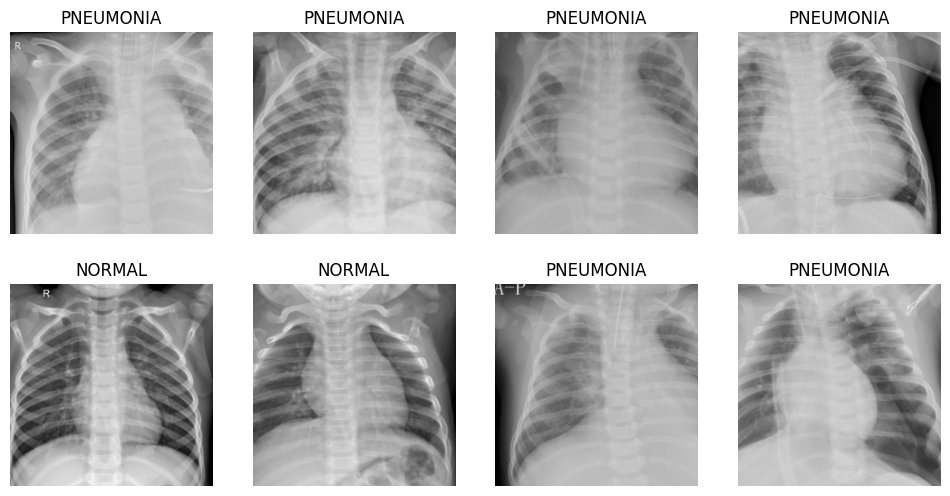

In [ ]:
data.show_batch(max_n=8)

In [ ]:
 learn = vision_learner(data,models.resnet50, metrics=[accuracy], model_dir =Path('Path'),path=Path("."))

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 190MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0012022644514217973)

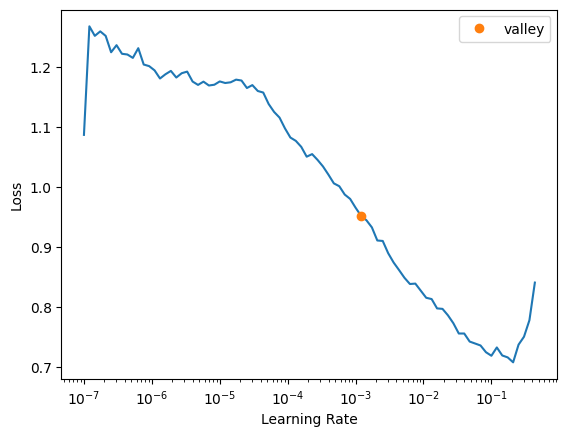

In [ ]:
learn.lr_find()

In [ ]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.502553,0.453509,0.911187,04:30
1,0.313672,0.182770,0.953886,04:29
2,0.129596,0.275297,0.964133,04:30
3,0.074258,0.099314,0.967122,04:45


In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)

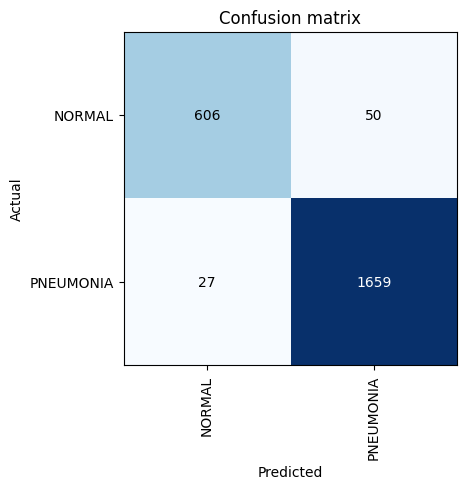

In [ ]:
interpret.plot_confusion_matrix()

In [ ]:
img = PILImage.create('/content/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg')

<Axes: >

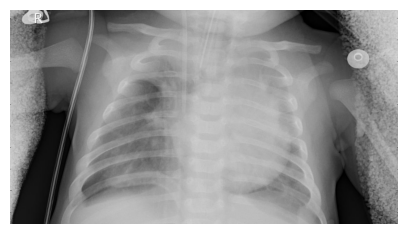

In [ ]:
img.show()

In [ ]:
print(learn.predict(img)[0])

PNEUMONIA
